In [19]:
import torch
import matplotlib.pyplot as plt
import math
import numpy as np

epoch 20, x1 -0.943467, x2 -0.000073


/home/clw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'color'


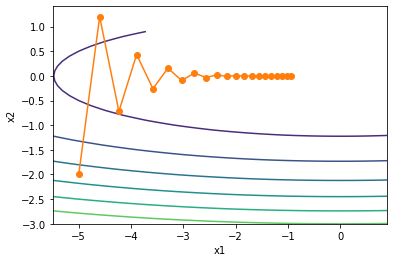

In [12]:
def train_2d(trainer, steps=20):
    x1, x2 = -5, -2
    v1, v2 =  0, 0
    results = [(x1, x2)]
    for i in range(steps):
        x1, x2,v1,v2 = trainer(x1, x2,v1,v2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results
eta = 0.4

def f_2d(x1,x2):
    return 0.1 * x1 **2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1 = 0,s2 =0 ):
    return (x1 - eta * 0.2 *x1, x2 - eta * 4 * x2, 0, 0)

def show_trace_2d(f, result):
    plt.plot(*zip(*result), '-o', color = '#ff7f0e')
    x1 , x2 = np.meshgrid(np.arange(-5.5 , 1.0, 0.1), np.arange(-3.0,1.0, 0.1))
    plt.contour(x1, x2, f(x1, x2),color = '#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')

show_trace_2d(f_2d , train_2d(gd_2d))

epoch 20, x1 -0.387814, x2 -1673.365109


/home/clw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'color'


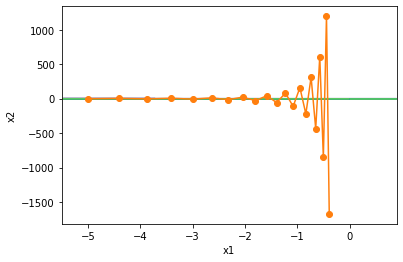

In [10]:
eta = 0.6
show_trace_2d(f_2d , train_2d(gd_2d))

epoch 20, x1 -0.062843, x2 0.001202


/home/clw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'color'


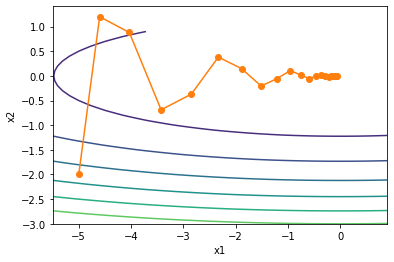

In [14]:
eta , beta =0.4,0.5
def momentum_wd(x1, x2, v1,v2):
    v1 = beta *v1 + eta * 0.2 * x1
    v2 = beta *v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1 , v2

show_trace_2d(f_2d , train_2d(momentum_wd))

epoch 20, x1 0.007188, x2 0.002553


/home/clw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'color'


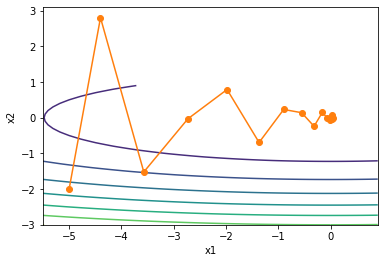

In [16]:
eta = 0.6
show_trace_2d(f_2d , train_2d(momentum_wd))

epoch 20, x1 -2.382563, x2 -0.158591


/home/clw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'color'


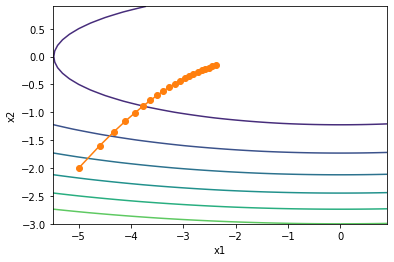

In [20]:
def adagrad_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6  # 前两项为自变量梯度
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

eta = 0.4
show_trace_2d(f_2d, train_2d(adagrad_2d))

epoch 20, x1 -0.010599, x2 0.000000


/home/clw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'color'


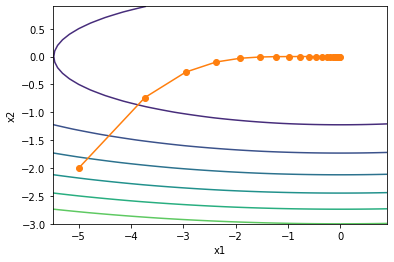

In [22]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = beta * s1 + (1 - beta) * g1 ** 2
    s2 = beta * s2 + (1 - beta) * g2 ** 2
    x1 -= alpha / math.sqrt(s1 + eps) * g1
    x2 -= alpha / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2
alpha, beta = 0.4, 0.9
show_trace_2d(f_2d, train_2d(rmsprop_2d))